# California Housing (1990s)


This is a typical dataset used by many books and online courses to demonstrate Machine Learning algorithms. The set contains Housing prices in California from the 1990s, which makes it kinda dated if you're looking to get actual predictions out of it, but that doesn't mean we can't use it to train models and compare them effectively! 

Without furthur adue, let me start by listing the steps (pipeline) I'm going to follow in this project. It is taken from Aurélien Géron's "Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow" Appendix B.


> "There are eight main steps:
> 1. Frame the problem and look at the big picture.
> 2. Get the data.
> 3. Explore the data to gain insights.
> 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms.
> 5. Explore many different models and shortlist the best ones.
> 6. Fine-tune your models and combine them into a great solution.
> 7. Present your solution.
> 8. Launch, monitor, and maintain your system.
> Obviously, you should feel free to adapt this checklist to your needs."

I'm going to break down each point into smaller steps that I usually use as checklist, ticking each as I go just so I don't miss anything!  
But before we start let's import the libraries we're going to use:

In [2]:
import numpy as np
import pandas as pd

import lib
%matplotlib inline

## 1.1 Frame the Problem and Look at the Big Picture:
To effectively frame the problem, you need to know the end goal of the project. Where does your model fit in the pipeline and which system/s it'll get the data from and feed to?  
It's very important to understand how a company is going to benefit from it. More often than not, models' outputs are used as inputs of another apps, which will make the investment decision.  
In our case, let's assume that the problem is to predict the `median_house_value` as a continuous varialbe and feed it to a downstream system that'll use it with many other inputs to form an investement decision.

1. Define the objective in business terms.
2. How will your solution be used?
3. What are the current solutions/workarounds (if any)?
4. How should you frame this problem (supervised/unsupervised, online/offline, etc.)?
5. How should performance be measured?
6. Is the performance measure aligned with the business objective?
 755
7. What would be the minimum performance needed to reach the business objec‐ tive?
8. What are comparable problems? Can you reuse experience or tools?
9. Is human expertise available?
10. How would you solve the problem manually?
11. List the assumptions you (or others) have made so far.
12. Verify assumptions if possible.

### 1.1.2 Performance Measure:
Because the problem is a regression and the output is continuous postitive variable, it's common to use RMSE (Root Mean Square Erro) as a performance measure. It's basically the square-root of MSE, which makes the error term more inline with the magnitude of the target.
$$MSE = \frac{1}{n} \sqrt{\sum\limits_{i=1}^n (y_i - \hat{y_i})^2}$$  
$$RMSE = \sqrt{MSE}$$
The downside of MSE & RMSE is that they penalize large errors, and they hard to interperate in the of the target in case you want to communicate the error term. To solve that, you should use MAE if your dataset contains a lot of outliers and/or you'd like to communicate the error term in an explanable unit (USD for example)
$$MAE = \frac{1}{n} |(y_i - \hat{y_i})|$$

I added three function in `lib\utils.py` to calculate each of these performance measures.

*Note: performance measures also used as cost function in many algorithms. Check this notebook for examples*

In [3]:
URL = 'https://github.com/ageron/handson-ml2/raw/master/datasets/housing'
filename = 'housing.tgz'
df = lib.fetch_online_zip_file(URL, filename, as_frame=True, overwrite=False)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


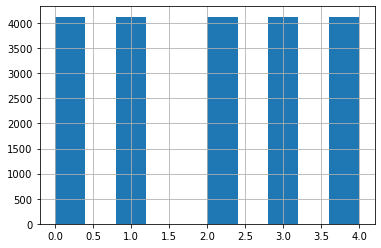

In [10]:
df = lib.gen_equal_length_cat_col(df, 'median_income', 5)
df['median_income_cat'].hist();

This is a key step in any analysis that protects participants from drifting away from the main objective. Many data-scientist fall into this trap when they become more focused on the problem instead of a solution. I know that finding a better way to code functions, trying different algorithms and scaling techniques is fun! But it's an endless rabbit hole. So don't get lost in it, especially if someone is paying you to find a solution for their problem and you have limited time to do that!